# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [1]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [2]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


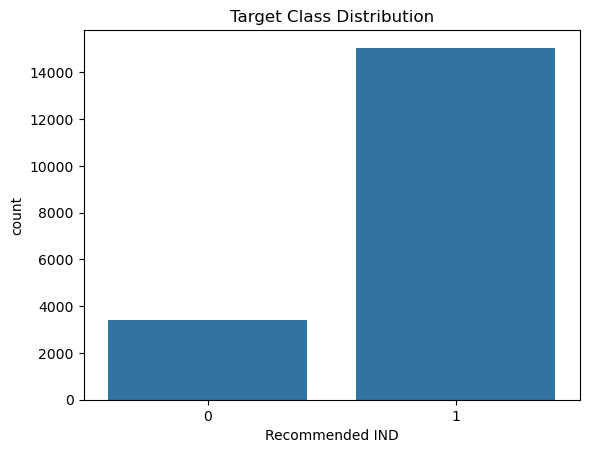

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class balance
sns.countplot(x='Recommended IND', data=df)
plt.title('Target Class Distribution')
plt.show()

In [4]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

I want to first analyse the columns each and sort them into numerical, categorical and text variables. 

### Clothing ID

Unique Clothing IDs: 
[   2    4    5    7    9   11   12   13   16   17   18   19   20   21
   22   25   26   29   30   45   52   55   62   63   65   70   75  112
  127  128  131  132  133  134  135  146  167  177  190  191  194  249
  256  262  271  279  282  294  298  299  306  316  323  324  326  332
  333  335  340  341  350  356  357  364  374  383  405  409  417  419
  429  433  435  437  446  447  448  449  450  451  453  456  460  472
  473  478  479  480  481  485  489  490  494  495  498  510  528  529
  530  533  537  539  540  541  542  546  550  551  552  555  559  560
  562  563  564  567  568  569  570  571  572  573  575  576  577  579
  582  586  587  588  589  590  592  593  596  597  602  603  604  605
  606  607  611  612  614  615  619  620  621  626  629  630  631  634
  635  636  640  641  643  647  649  661  667  669  673  674  676  693
  703  705  717  721  733  734  749  762  806  815  816  817  818  819
  820  821  822  823  824  825  826  827  828  829  830

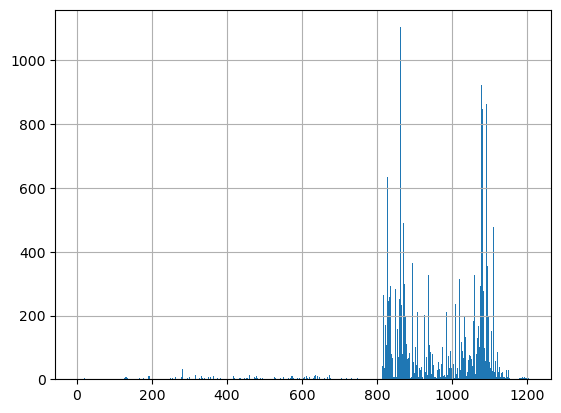

In [5]:
# Plot a histogram of the 'Clothing ID' column to visualize the frequency distribution
# across different product IDs. The high number of bins allows us to see individual product frequencies.
X['Clothing ID'].hist(bins=500)

# Extract all unique Clothing IDs from the dataset (i.e., the distinct products)
CID = X['Clothing ID'].unique()

# Sort the unique Clothing IDs in ascending order for easier interpretation or indexing
CID.sort()

# Print the sorted list of unique Clothing IDs
print('Unique Clothing IDs: ')
print(CID)

# Print the total number of unique Clothing IDs in the dataset
# This gives you a sense of how many different products are represented
print('Total number of unique Clothing IDs: '+str(len(CID)))


In [6]:
# Count the number of reviews per product
review_counts = df.groupby("Clothing ID").size().reset_index(name="Number of Reviews")

# Calculate the average recommendation rate per product
recommendation_rate = df.groupby("Clothing ID")["Recommended IND"].mean().reset_index(name="Recommendation Rate")

# Calculate the average age per product
avg_age = df.groupby("Clothing ID")["Age"].mean().reset_index(name="Average Age")

# Calculate the average positive feedback count per product
avg_feedback = df.groupby("Clothing ID")["Positive Feedback Count"].mean().reset_index(name="Average Feedback Count")

# Merge all statistics into one table
product_stats = review_counts.merge(recommendation_rate, on="Clothing ID") \
                             .merge(avg_age, on="Clothing ID") \
                             .merge(avg_feedback, on="Clothing ID")

# Normalize the average age (z-score standardization)
mean_age = product_stats["Average Age"].mean()
std_age = product_stats["Average Age"].std()
product_stats["Normalized Average Age"] = (product_stats["Average Age"] - mean_age) / std_age

# Optionally: sort by number of reviews
product_stats = product_stats.sort_values("Number of Reviews", ascending=False)

# Display the first few rows
product_stats.head()

,Clothing ID,Number of Reviews,Recommendation Rate,Average Age,Average Feedback Count,Normalized Average Age
433,1078,871,0.811711,42.719862,2.859931,-0.056850
223,862,658,0.811550,43.542553,2.583587,0.049520
449,1094,651,0.818740,41.562212,3.480799,-0.206529
436,1081,487,0.852156,42.293634,3.203285,-0.111960
191,829,452,0.825221,44.497788,2.457965,0.173028


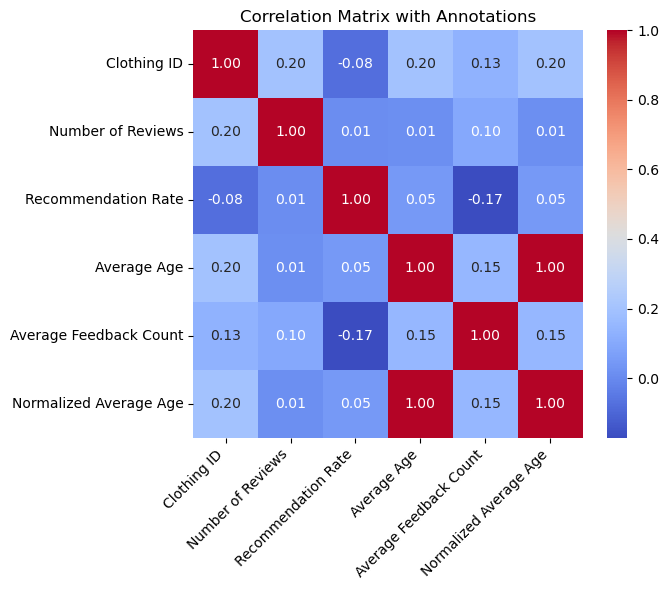

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric features
numeric_features = product_stats.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_features.corr()

# Plot heatmap with annotations
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True,
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)
plt.title("Correlation Matrix with Annotations")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Age

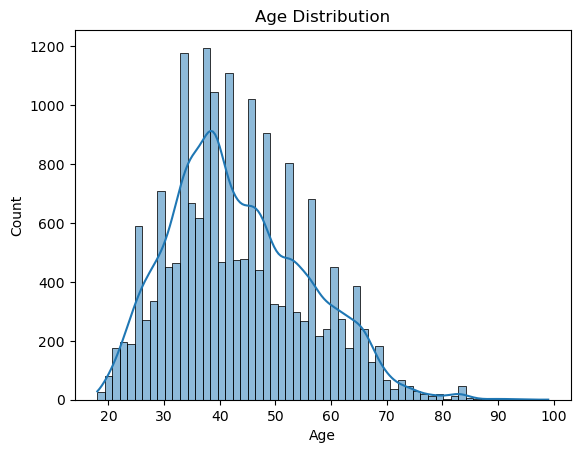

Unique Age Values: 
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 89 90
 91 92 93 94 99]


In [8]:
# Age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

Age_unique = X['Age'].unique()
Age_unique.sort()
print('Unique Age Values: ')
print(Age_unique)

### Title

Title
Love it!                            129
Beautiful                            88
Love                                 81
Love!                                79
Beautiful!                           71
                                   ... 
Great throw-on piece                  1
La la love!                           1
Flattering and functional             1
Comfortable and work appropriate      1
Please make more like this one!       1
Name: count, Length: 13142, dtype: int64
Number of unique review titles: 13142
count    18442.000000
mean        19.067672
std          9.569247
min          2.000000
25%         12.000000
50%         17.000000
75%         24.000000
max         52.000000
Name: Title, dtype: float64


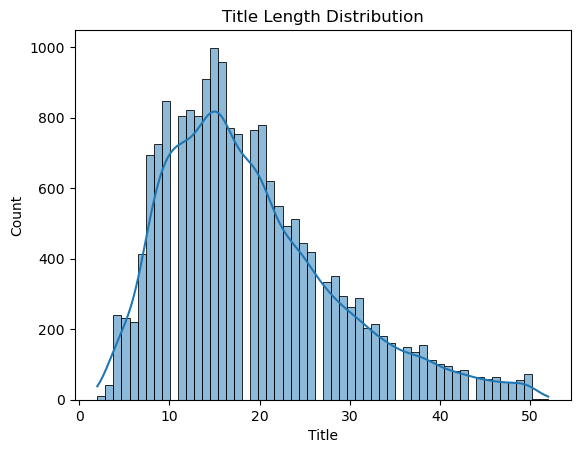

Proportion of titles that contain at least one digit:
0.005964645916928749
Number of missing titles and the number of titles that are empty strings:
0 0


title_has_digit
False    0.816278
True     0.809091
Name: Recommended IND, dtype: float64

In [9]:
# Print the count of each unique title in the dataset (i.e., how often each title appears)
print(df['Title'].value_counts())

# Print the number of unique review titles
print('Number of unique review titles: ' +str(df['Title'].nunique()))

# Get descriptive statistics (count, mean, std, min, max, quartiles) for the length of the titles
print(df['Title'].str.len().describe())

# Plot a histogram of title lengths to visualize their distribution
sns.histplot(df['Title'].str.len(), kde=True)
plt.title('Title Length Distribution')
plt.show()
# Calculate the proportion of titles that contain at least one digit
# This can indicate references to product numbers, sizes, or model codes
print('Proportion of titles that contain at least one digit:')
print(df['Title'].str.contains(r'\d').mean())

# Print the number of missing titles and the number of titles that are empty strings
# This helps assess data quality and potential need for imputation or filtering
print('Number of missing titles and the number of titles that are empty strings:')
print(df['Title'].isna().sum(), (df['Title'] == '').sum())

# Create a binary feature indicating whether the review title contains at least one digit
df['title_has_digit'] = df['Title'].str.contains(r'\d', na=False)
# Calculate the average recommendation rate for titles with and without digits
df.groupby('title_has_digit')['Recommended IND'].mean()

### Review Text

Number of unique reviews: 18439
count    18442.000000
mean       319.989535
std        141.953692
min          9.000000
25%        201.000000
50%        317.500000
75%        478.000000
max        508.000000
Name: Review Text, dtype: float64


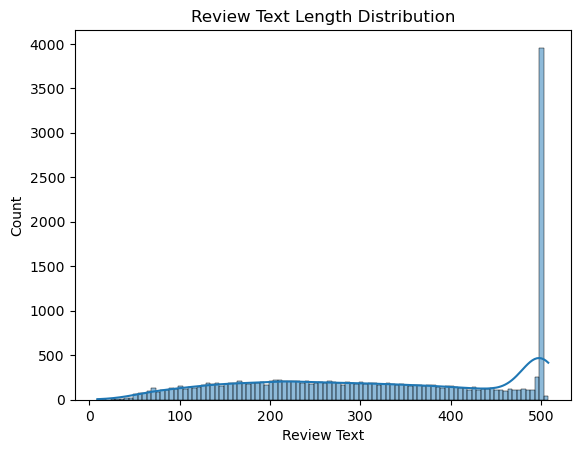

Proportion of reviews that contain at least one digit:
0.4048910096518816
Number of missing reviews and the number of reviews that are empty strings:
0 0


title_has_digit
False    0.816278
True     0.809091
Name: Recommended IND, dtype: float64

In [10]:
# Print the count of each unique review in the dataset (i.e., how often each reviews appears)
# print(df['Review Text'].value_counts()) # long output

# Print the number of unique review texts - strangely there are some
print('Number of unique reviews: ' +str(df['Review Text'].nunique()))

# Get descriptive statistics (count, mean, std, min, max, quartiles) for the length of the titles
print(df['Review Text'].str.len().describe())

# Plot a histogram of review lengths to visualize their distribution
sns.histplot(df['Review Text'].str.len(), bins = 100, kde=True)
plt.title('Review Text Length Distribution')
plt.show()

# Calculate the proportion of reviews that contain at least one digit
# This can indicate references to product numbers, sizes, or model codes
print('Proportion of reviews that contain at least one digit:')
print(df['Review Text'].str.contains(r'\d').mean())

# Print the number of missing reviews and the number of reviews that are empty strings
# This helps assess data quality and potential need for imputation or filtering
print('Number of missing reviews and the number of reviews that are empty strings:')
print(df['Review Text'].isna().sum(), (df['Title'] == '').sum())

# Create a binary feature indicating whether the review title contains at least one digit
df['title_has_digit'] = df['Title'].str.contains(r'\d', na=False)
# Calculate the average recommendation rate for titles with and without digits
df.groupby('title_has_digit')['Recommended IND'].mean()

### Positive Feedback Count	

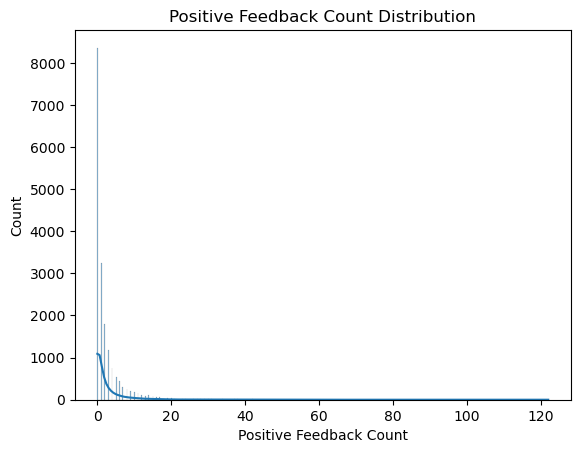

Unique Positive Feedback Count Values: 
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  57  58  59  61  64  65  66  68  69  77  78  81  82  84  87  89
  93  94  95  98  99 108 122]
count    18442.000000
mean         2.697484
std          5.942220
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64


In [11]:
# Positive Feedback Count distribution
sns.histplot(df['Positive Feedback Count'], kde=True)
plt.title('Positive Feedback Count Distribution')
plt.show()

PFC_unique = X['Positive Feedback Count'].unique()
PFC_unique.sort()
print('Unique Positive Feedback Count Values: ')
print(PFC_unique)
print(X['Positive Feedback Count'].describe())

### Division Name

In [12]:
X['Division Name'].describe()

count       18442
unique          2
top       General
freq        11664
Name: Division Name, dtype: object

<Axes: >

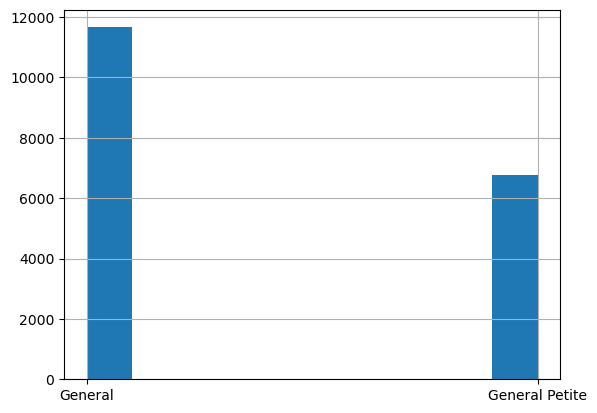

In [13]:
X['Division Name'].hist()

### Department Name

In [14]:
X['Department Name'].value_counts()

Department Name
Tops        8713
Dresses     5371
Bottoms     3184
Jackets      879
Intimate     188
Trend        107
Name: count, dtype: int64

### Class Name

In [15]:
X['Class Name'].value_counts()

Class Name
Dresses           5371
Knits             3981
Blouses           2587
Sweaters          1218
Pants             1157
Jeans              970
Fine gauge         927
Skirts             796
Jackets            598
Outerwear          281
Shorts             260
Lounge             188
Trend              107
Casual bottoms       1
Name: count, dtype: int64

## Building Pipeline

Split data into numerical, categorical, and text features

In [16]:
num_features = (
    X[[
        'Clothing ID',
        'Age',
        'Positive Feedback Count'
    ]].columns
)
print('Numerical features:', num_features)

cat_features = (
    X[[
        'Division Name',
        'Department Name',
        'Class Name',
    ]].columns
)
print('Categorical features:', cat_features)

text_features = (
    [
        'Title',
        'Review Text',
    ]
)
print ('Text features:', text_features)


Numerical features: Index(['Clothing ID', 'Age', 'Positive Feedback Count'], dtype='object')
Categorical features: Index(['Division Name', 'Department Name', 'Class Name'], dtype='object')
Text features: ['Title', 'Review Text']


## Training Pipeline

### Numerical features

In [17]:
from pipeline import num_clothingid_pipeline

num_clothingid_pipeline

Pipeline(steps=[('review_count', ReviewCountEncoder(column='Clothing ID')),
                ('scaler', StandardScaler())])

In [18]:
from pipeline import num_age_pipeline

num_age_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [19]:
from pipeline import num_positive_feedback_count_pipeline

num_positive_feedback_count_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('transformer',
                 FunctionTransformer(func=<function log_transform at 0x14db97880>))])

### Categorical features

In [20]:
from pipeline import cat_pipeline

cat_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('cat_encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

### Text features

In [23]:
from sklearn.pipeline import FeatureUnion
import numpy as np
from transformers import CountCharacter, MeasureTextLength, ContrastWordCounter
from pipeline import initial_text_preprocess
from sklearn.pipeline import Pipeline


feature_engineering = FeatureUnion([
#    ('count_dots', CountCharacter(character='.')),
    ('count_exclamations', CountCharacter(character='!')),
    ('count_question_marks', CountCharacter(character='?')),
    ('measure_text_length', MeasureTextLength()),
    ('count_contrast_words', ContrastWordCounter()),
])

character_counts_pipeline = Pipeline([
    (
        'initial_text_preprocess',
        initial_text_preprocess,
    ),
    (
        'feature_engineering',
        feature_engineering,
    ),
])
character_counts_pipeline

Pipeline(steps=[('initial_text_preprocess',
                 Pipeline(steps=[('dimension_reshaper',
                                  FunctionTransformer(func=<function squeeze_array at 0x14e7564d0>))])),
                ('feature_engineering',
                 FeatureUnion(transformer_list=[('count_exclamations',
                                                 CountCharacter(character='!')),
                                                ('count_question_marks',
                                                 CountCharacter(character='?')),
                                                ('measure_text_length',
                                                 MeasureTextLength()),
                                                ('count_contrast_words',
                                                 ContrastWordCounter(words=['but',
                                                                            'however',
                                                                            'not',
                                                                            "n't",
                                                                            'although',
                                                                            'yet',
                                                                            'too',
                                                                            'no',
                                                                            'dissapoint',
                                                                            'poor',
                                                                            'unfortunat']))]))])

In [24]:
#! python -m spacy download en_core_web_md

In [25]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [26]:
from pipeline import tfidf_pipeline

tfidf_pipeline 

Pipeline(steps=[('dimension_reshaper',
                 Pipeline(steps=[('dimension_reshaper',
                                  FunctionTransformer(func=<function squeeze_array at 0x14e7564d0>))])),
                ('lemmatizer', SpacyLemmatizer()),
                ('tfidf_vectorizer',
                 TfidfVectorizer(ngram_range=(1, 2), stop_words='english'))])

In [27]:
# !pip install spacytextblob

In [28]:
from spacy_transformers import SpacyPosNerFeaturesMultiCharRelative
spacy_transformer = SpacyPosNerFeaturesMultiCharRelative(text_columns=['Title', 'Review Text'])
spacy_features = spacy_transformer.fit_transform(df)
feature_df = spacy_features.copy()
feature_df['Recommended IND'] = df['Recommended IND'].values
correlations = feature_df.corr(numeric_only=True)['Recommended IND'].sort_values(ascending=False)
print(correlations)


Recommended IND                         1.000000
Review Text_rel_adjectives_per_char     0.134034
Review Text_rel_adjectives_per_token    0.130199
Title_rel_adjectives_per_token          0.078432
Title_rel_adjectives_per_char           0.055001
Name: Recommended IND, dtype: float64


In [29]:
from sklearn.compose import ColumnTransformer
from spacy_transformers import SpacyPosNerFeaturesMultiCharRelative, SpacyVectorTransformer, SpacySentimentTransformer
from transformers import CharacterCountsMultiColumnTransformer, TfidfMultiColumnTransformer

# POS/NER pipeline for multiple columns
pos_ner_pipeline = Pipeline([
    ('spacy_pos_ner', SpacyPosNerFeaturesMultiCharRelative(text_columns=['Review Text', 'Title']))
])

# Character count pipeline for multiple columns
char_counts_transformer = CharacterCountsMultiColumnTransformer(
    text_columns=['Title', 'Review Text'],
    base_pipeline=character_counts_pipeline
)

# Now add it to the feature_engineering step
feature_engineering = ColumnTransformer([
#    ('num_clothingid', num_clothingid_pipeline, ['Clothing ID']),
#    ('num_age', num_age_pipeline, ['Age']),
#    ('num_positive_feedback_count', num_positive_feedback_count_pipeline, ['Positive Feedback Count']),
#    ('cat', cat_pipeline, cat_features),
#    ('text_embed', SpacyVectorTransformer(), 'Title'),
])

full_feature_union = FeatureUnion([
    ('column_features', feature_engineering),  # your existing ColumnTransformer
    ('char_counts_features', CharacterCountsMultiColumnTransformer(
        text_columns=['Title'], base_pipeline=character_counts_pipeline)
    ),
    ('pos_ner_features', SpacyPosNerFeaturesMultiCharRelative(['Review Text'])),
    ('tfidf_features', TfidfMultiColumnTransformer(
        text_columns=['Title', 'Review Text'], base_pipeline=tfidf_pipeline), ),
    ('sentiment_transformer', SpacySentimentTransformer(columns=['Review Text', 'Title'])),
])

full_feature_union

FeatureUnion(transformer_list=[('column_features',
                                ColumnTransformer(transformers=[])),
                               ('char_counts_features',
                                CharacterCountsMultiColumnTransformer(base_pipeline=Pipeline(steps=[('initial_text_preprocess',
                                                                                                     Pipeline(steps=[('dimension_reshaper',
                                                                                                                      FunctionTransformer(func=<function squeeze_array at 0x14e7564d0>))])),
                                                                                                    ('feature_engineering',
                                                                                                     FeatureUnion(tran...
                                TfidfMultiColumnTransformer(base_pipeline=Pipeline(steps=[('dimension_reshaper',
                                                                                           Pipeline(steps=[('dimension_reshaper',
                                                                                                            FunctionTransformer(func=<function squeeze_array at 0x14e7564d0>))])),
                                                                                          ('lemmatizer',
                                                                                           SpacyLemmatizer()),
                                                                                          ('tfidf_vectorizer',
                                                                                           TfidfVectorizer(ngram_range=(1,
                                                                                                                        2),
                                                                                                           stop_words='english'))]),
                                                            text_columns=['Title',
                                                                          'Review '
                                                                          'Text'])),
                               ('sentiment_transformer',
                                SpacySentimentTransformer(columns=['Review '
                                                                   'Text',
                                                                   'Title']))])

## Testing different classifiers

In [28]:
from sklearn.ensemble import RandomForestClassifier


rf_model_pipeline = Pipeline([
    ('features', full_feature_union),
    ('classifier', RandomForestClassifier(class_weight='balanced_subsample', random_state=27)),
])

rf_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('column_features',
                                                 ColumnTransformer(transformers=[])),
                                                ('char_counts_features',
                                                 CharacterCountsMultiColumnTransformer(base_pipeline=Pipeline(steps=[('initial_text_preprocess',
                                                                                                                      Pipeline(steps=[('dimension_reshaper',
                                                                                                                                       FunctionTransformer(func=<function <lambda> at 0x3086ee680>))])),
                                                                                                                     ('feature_enginee...
                                                                                                            FunctionTransformer(func=<function <lambda> at 0x14dec5870>)),
                                                                                                           ('lemmatizer',
                                                                                                            SpacyLemmatizer()),
                                                                                                           ('tfidf_vectorizer',
                                                                                                            TfidfVectorizer(ngram_range=(1,
                                                                                                                                         2),
                                                                                                                            stop_words='english'))]),
                                                                             text_columns=['Title',
                                                                                           'Review '
                                                                                           'Text'])),
                                                ('sentiment_transformer',
                                                 SpacySentimentTransformer(columns=['Review '
                                                                                    'Text',
                                                                                    'Title']))])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        random_state=27))])

In [29]:
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

y_pred_forest_pipeline = rf_model_pipeline.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)
#scores = cross_val_score(rf_model_pipeline, X_train, y_train, cv=5, scoring='f1')

print('Accuracy:', accuracy_forest_pipeline)
#print(f"Mean F1 Score = {scores.mean():.4f}")


Accuracy: 0.865040650406504


              precision    recall  f1-score   support

           0       0.82      0.31      0.45       327
           1       0.87      0.99      0.92      1518

    accuracy                           0.87      1845
   macro avg       0.84      0.65      0.68      1845
weighted avg       0.86      0.87      0.84      1845



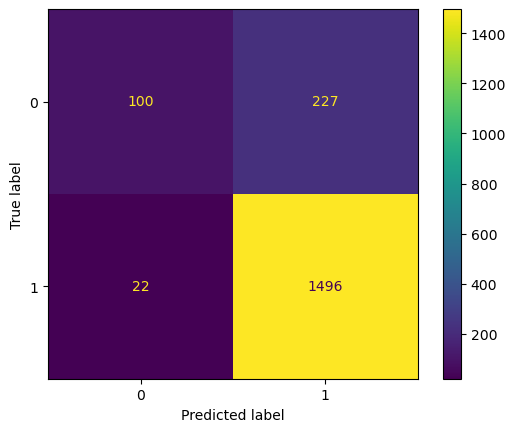

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = rf_model_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(rf_model_pipeline, X_test, y_test)
plt.show()

In [31]:
# Create a DataFrame to analyze predictions
results_df = pd.DataFrame(X_test.copy())  # Copy to avoid overwriting
results_df['true_label'] = y_test
results_df['predicted'] = y_pred

# Filter False Positives (predicted 1, actually 0)
false_positives = results_df[(results_df['true_label'] == 0) & (results_df['predicted'] == 1)]

# Show results
false_positives.head()
print(false_positives['Title'].tolist())

['Beautiful, but....', 'What a mess!', 'Do not like the front', 'Not impressed', 'Cute pant', 'Eh', '00 petite is way too short on the sides', 'Really disappointed with the quality.', 'Scratchy!', 'Mini version????', 'Too small', 'Polka dots', 'Not for the busty', 'Beautiful! ...but not for a long torso', 'Looks cute - but sheds!', 'Cute but not comfortable', 'Frompy', 'Not great', 'Choral ruffle top', 'Beautiful top but large arm holes', 'Great style, poor quality', 'Do not buy it!!!', 'Product great for a tall person', 'Ahahahaha', 'Runs very large', 'Great dress for ladies with smaller curves', 'Cute but chunky', 'Not a good fit', 'Cute pattern but weird fit', 'More faded than they look here', 'Not the original!', 'Dangerous beads on back-will rip upholstery', 'Maybe not great for a petite', 'Pretty, soft, sheer', 'Awkward shape, cute fabric', 'Great price (on sale) but sheds too much!', "Beautiful but won't work for me", "So disappointed in retailer's descriptions lately...", 'Beau

In [ ]:
# Group by age brackets (e.g. 10-year bins)
false_positives['age_group'] = pd.cut(false_positives['Age'], bins=range(10, 100, 10))

# Plot count of false positives by age group
false_positives['age_group'].value_counts().sort_index().plot(kind='bar')
plt.title("False Positives by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Distribution of 'Positive Feedback Count' in false positives vs. true negatives
sns.kdeplot(data=false_positives, x='Positive Feedback Count', label='False Positives', fill=True)
sns.kdeplot(data=results_df[(results_df['true_label'] == 0) & (results_df['predicted'] == 0)],
            x='Positive Feedback Count', label='True Negatives', fill=True)
plt.legend()
plt.title("Distribution of Feedback Count in False Positives vs True Negatives")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Combine title and review if needed
texts = false_positives['Review Text'].fillna('')

# Get common word counts
vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_matrix = vectorizer.fit_transform(texts)
word_freq = pd.DataFrame(word_matrix.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)

# Plot
word_freq.plot(kind='bar')
plt.title("Most Frequent Words in False Positive Reviews")
plt.xticks(rotation=45)
plt.show()

In [ ]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(false_positives['Review Text'].fillna(''))

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D for plotting
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(tfidf_matrix.toarray())

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(tfidf_2d[:, 0], tfidf_2d[:, 1], alpha=0.5)
plt.title("PCA of TF-IDF vectors for False Positive Reviews")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_2d = tsne.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(tsne_2d[:, 0], tsne_2d[:, 1], alpha=0.5)
plt.title("t-SNE of TF-IDF vectors for False Positive Reviews")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

In [ ]:
import spacy
import numpy as np

nlp = spacy.load("en_core_web_md")  # Or "en_core_web_lg" for more accuracy

# Apply to each review text
texts = false_positives['Review Text'].fillna('')
embeddings = np.array([nlp(text).vector for text in texts])

tsne = TSNE(n_components=2, random_state=42)
embedding_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], alpha=0.5)
plt.title("t-SNE of spaCy Embeddings for False Positive Reviews")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

In [ ]:
plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1],
            c=false_positives['Age'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Age')
plt.title("False Positives: t-SNE of Embeddings Colored by Age")
plt.show()

In [32]:
from sklearn.ensemble import GradientBoostingClassifier


gb_model_pipeline = Pipeline([
    ('features', full_feature_union),
    ('classifier', GradientBoostingClassifier(random_state=27)),
])

gb_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('column_features',
                                                 ColumnTransformer(transformers=[])),
                                                ('char_counts_features',
                                                 CharacterCountsMultiColumnTransformer(base_pipeline=Pipeline(steps=[('initial_text_preprocess',
                                                                                                                      Pipeline(steps=[('dimension_reshaper',
                                                                                                                                       FunctionTransformer(func=<function <lambda> at 0x3086ee680>))])),
                                                                                                                     ('feature_enginee...
                                                                                                            FunctionTransformer(func=<function <lambda> at 0x14dec5870>)),
                                                                                                           ('lemmatizer',
                                                                                                            SpacyLemmatizer()),
                                                                                                           ('tfidf_vectorizer',
                                                                                                            TfidfVectorizer(ngram_range=(1,
                                                                                                                                         2),
                                                                                                                            stop_words='english'))]),
                                                                             text_columns=['Title',
                                                                                           'Review '
                                                                                           'Text'])),
                                                ('sentiment_transformer',
                                                 SpacySentimentTransformer(columns=['Review '
                                                                                    'Text',
                                                                                    'Title']))])),
                ('classifier', GradientBoostingClassifier(random_state=27))])

In [33]:
from sklearn.metrics import accuracy_score

y_pred_gb_pipeline = gb_model_pipeline.predict(X_test)
accuracy_gb_pipeline = accuracy_score(y_test, y_pred_gb_pipeline)
#scores = cross_val_score(gb_model_pipeline, X_train, y_train, cv=5, scoring='f1')

print('Accuracy:', accuracy_gb_pipeline)
#print(f"Mean F1 Score = {scores.mean():.4f}")

Accuracy: 0.8850948509485095


              precision    recall  f1-score   support

           0       0.73      0.55      0.63       327
           1       0.91      0.96      0.93      1518

    accuracy                           0.89      1845
   macro avg       0.82      0.75      0.78      1845
weighted avg       0.88      0.89      0.88      1845



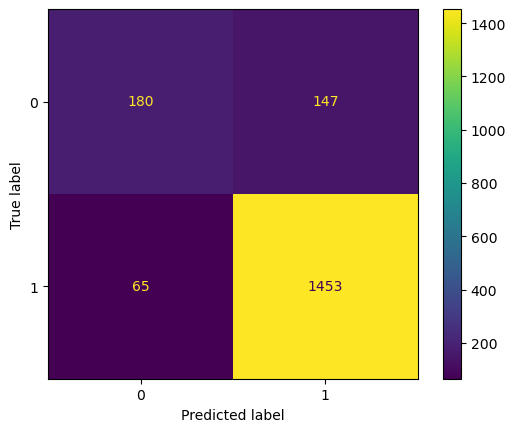

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred_gb_pipeline))
ConfusionMatrixDisplay.from_estimator(gb_model_pipeline, X_test, y_test)
plt.show()

In [31]:
from sklearn.neural_network import MLPClassifier


mlp_model_pipeline = Pipeline([
    ('features', full_feature_union),
    ('classifier', MLPClassifier(random_state=27)),
])

#mlp_model_pipeline.fit(X_train, y_train)

Accuracy: 0.9105691056910569
              precision    recall  f1-score   support

           0       0.77      0.70      0.74       327
           1       0.94      0.96      0.95      1518

    accuracy                           0.91      1845
   macro avg       0.86      0.83      0.84      1845
weighted avg       0.91      0.91      0.91      1845



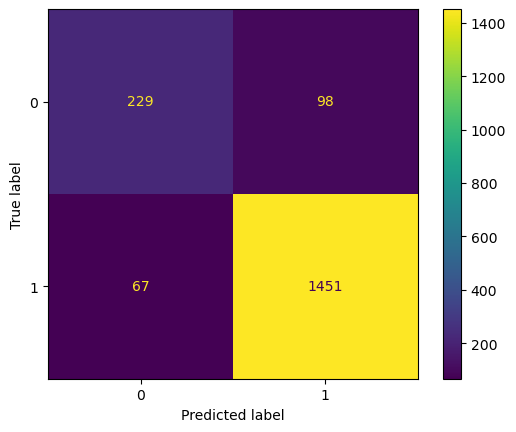

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_mlp_pipeline = mlp_model_pipeline.predict(X_test)
accuracy_mlp_pipeline = accuracy_score(y_test, y_pred_mlp_pipeline)

print('Accuracy:', accuracy_mlp_pipeline)

print(classification_report(y_test, y_pred_mlp_pipeline))
ConfusionMatrixDisplay.from_estimator(mlp_model_pipeline, X_test, y_test)
plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression


lr_model_pipeline = Pipeline([
    ('features', full_feature_union),
#    ('classifier', LogisticRegression(random_state=27)),
    ('classifier', LogisticRegression(max_iter=2000, solver='saga', random_state=42)),
])

#lr_model_pipeline.fit(X_train, y_train)

In [38]:
from sklearn.metrics import accuracy_score

y_pred_lr_pipeline = lr_model_pipeline.predict(X_test)
accuracy_lr_pipeline = accuracy_score(y_test, y_pred_lr_pipeline)

print('Accuracy:', accuracy_lr_pipeline)

Accuracy: 0.9024390243902439


## Fine-Tuning Pipeline

In [46]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet'],
    'classifier__C': loguniform(1e-4, 1e2),
    'classifier__l1_ratio': np.linspace(0, 1, 10),  # wird ignoriert, wenn nicht elasticnet
    'classifier__class_weight': [None, 'balanced']
}

search = RandomizedSearchCV(
    lr_model_pipeline,
    param_distributions=param_distributions,
    n_iter=5,
    scoring='f1',
    cv=5,
    n_jobs=1,
    random_state=42
)

search.fit(X_train, y_train)
search.best_params_

/Users/lucianwillareth/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/lucianwillareth/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/lucianwillareth/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/lucianwillareth/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/lucianwillareth/mambaforge/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when

{'classifier__C': 0.3811544088653064,
 'classifier__class_weight': 'balanced',
 'classifier__l1_ratio': 0.2222222222222222,
 'classifier__penalty': 'elasticnet'}

Accuracy: 0.8699186991869918
              precision    recall  f1-score   support

           0       0.59      0.87      0.70       327
           1       0.97      0.87      0.92      1518

    accuracy                           0.87      1845
   macro avg       0.78      0.87      0.81      1845
weighted avg       0.90      0.87      0.88      1845



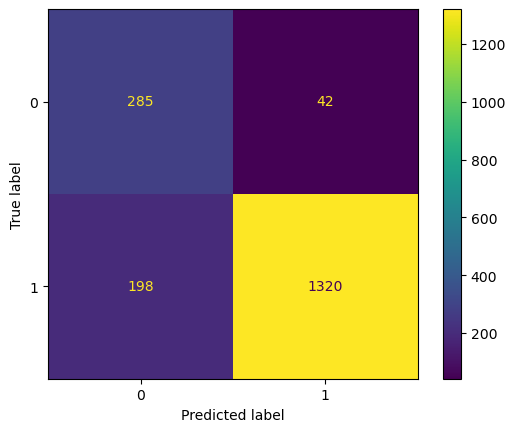

{'classifier__C': 0.3811544088653064,
 'classifier__class_weight': 'balanced',
 'classifier__l1_ratio': 0.2222222222222222,
 'classifier__penalty': 'elasticnet'}

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model_best_lr = search.best_estimator_
model_best_lr
y_pred_optimized_pipeline = model_best_lr.predict(X_test)
accuracy_optimized_pipeline = accuracy_score(y_test, y_pred_optimized_pipeline)

print('Accuracy:', accuracy_optimized_pipeline)

print(classification_report(y_test, y_pred_optimized_pipeline))
ConfusionMatrixDisplay.from_estimator(model_best_lr, X_test, y_test)
plt.show()
search.best_params_

### GradientBoostingClassifier

In [ ]:
# GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'classifier__n_estimators': [200],
    'classifier__learning_rate': [0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2],
    'classifier__min_samples_leaf': [1],
    'classifier__subsample': [1.0],
    'classifier__max_features': [None]
}


param_search = RandomizedSearchCV(
    estimator=gb_model_pipeline,
    param_distributions=param_dist,
    n_iter=5,     # Try 6 different combinations of parameters
    cv=5,         # Use 5-fold cross-validation
    n_jobs=-1,    # Use all available processors (for multiprocessing)
    refit=True,   # Refit the model using the best parameters found
    verbose=3,    # Output of parameters, score, time
    random_state=27,
)
#print(param_search.get_params().keys())

param_search.fit(X_train, y_train)

# Retrieve the best parameters
param_search.best_params_

In [ ]:
model_best = param_search.best_estimator_
model_best
y_pred_optimized_pipeline = model_best.predict(X_test)
accuracy_optimized_pipeline = accuracy_score(y_test, y_pred_optimized_pipeline)

print('Accuracy:', accuracy_optimized_pipeline)

### RandomForestClassifier

In [ ]:
# RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


param_dist = {
    'classifier__n_estimators': [200],
    'classifier__max_depth': [None],
    'features__column_features__tfidf_text_title__tfidf_vectorizer__max_df': [0.75, 1.0],
    'classifier__min_samples_split': [2],#, 5],
    'classifier__min_samples_leaf': [1],#, 2, 4],
    'classifier__max_features': [None],#, None, 'sqrt'],
    'classifier__bootstrap': [True],#, False]
}



param_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=param_dist,
    n_iter=6,     # Try 6 different combinations of parameters
    cv=5,         # Use 5-fold cross-validation
    n_jobs=-1,    # Use all available processors (for multiprocessing)
    refit=True,   # Refit the model using the best parameters found
    verbose=3,    # Output of parameters, score, time
    random_state=27,
)
#print(param_search.get_params().keys())

param_search.fit(X_train, y_train)

# Retrieve the best parameters
param_search.best_params_

In [ ]:
model_best = param_search.best_estimator_
model_best

{'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__max_features': None,
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__bootstrap': True,
 'columntransformer__tfidf_text_review__tfidf_vectorizer__max_df': 1.0}

 Accuracy: 0.8802168021680217

### MLPClassifier

In [32]:
# MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

#hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', 
#learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, 
#warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, 
#beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000

param_dist = {
    'classifier__hidden_layer_sizes': [(100,70),(100,50)],
    'classifier__activation': ['relu'],
    'classifier__alpha': [0.0001],
    'classifier__learning_rate_init': [0.001],
    'classifier__max_iter':[200], 
    'classifier__early_stopping':[False],
    'classifier__random_state': [42]
}

param_search = RandomizedSearchCV(
    estimator=mlp_model_pipeline,
    param_distributions=param_dist,
    n_iter=6,     # Try 6 different combinations of parameters
    scoring='precision',
    cv=5,         # Use 5-fold cross-validation
    n_jobs=1,    # Use all available processors (for multiprocessing)
    refit=True,   # Refit the model using the best parameters found
    verbose=3,    # Output of parameters, score, time
    random_state=27,
    error_score='raise',
)
#print(param_search.get_params().keys())

param_search.fit(X_train, y_train)

# Retrieve the best parameters
param_search.best_params_

/Users/lucianwillareth/mambaforge/lib/python3.10/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=6. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END classifier__activation=relu, classifier__alpha=0.0001, classifier__early_stopping=False, classifier__hidden_layer_sizes=(100, 70), classifier__learning_rate_init=0.001, classifier__max_iter=200, classifier__random_state=42;, score=0.931 total time= 7.3min
[CV 2/5] END classifier__activation=relu, classifier__alpha=0.0001, classifier__early_stopping=False, classifier__hidden_layer_sizes=(100, 70), classifier__learning_rate_init=0.001, classifier__max_iter=200, classifier__random_state=42;, score=0.926 total time= 7.3min
[CV 3/5] END classifier__activation=relu, classifier__alpha=0.0001, classifier__early_stopping=False, classifier__hidden_layer_sizes=(100, 70), classifier__learning_rate_init=0.001, classifier__max_iter=200, classifier__random_state=42;, score=0.924 total time= 7.6min
[CV 4/5] END classifier__activation=relu, classifier__alpha=0.0001, classifier__early_stopping=False, classifier__hidden_layer_sizes=

{'classifier__random_state': 42,
 'classifier__max_iter': 200,
 'classifier__learning_rate_init': 0.001,
 'classifier__hidden_layer_sizes': (100, 50),
 'classifier__early_stopping': False,
 'classifier__alpha': 0.0001,
 'classifier__activation': 'relu'}

Accuracy: 0.9111111111111111
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       327
           1       0.94      0.96      0.95      1518

    accuracy                           0.91      1845
   macro avg       0.86      0.83      0.84      1845
weighted avg       0.91      0.91      0.91      1845



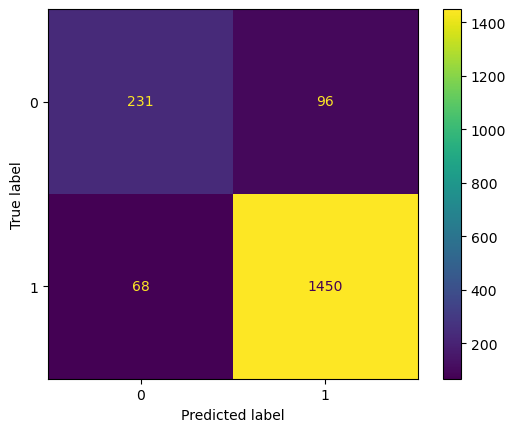

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

model_best = param_search.best_estimator_
model_best
y_pred_optimized_pipeline = model_best.predict(X_test)
accuracy_optimized_pipeline = accuracy_score(y_test, y_pred_optimized_pipeline)

print('Accuracy:', accuracy_optimized_pipeline)

print(classification_report(y_test, y_pred_optimized_pipeline))
ConfusionMatrixDisplay.from_estimator(model_best, X_test, y_test)
plt.show()

In [34]:
import pickle

# Speichern
with open('mlp_100_50_model.pkl', 'wb') as f:
    pickle.dump(model_best, f)